# Assignment 2, TET4565 


## Dependencies / imports


In [1]:
import pyomo.environ as pyo
import numpy as np
from pyomo.environ import ConcreteModel,Set,RangeSet,Param,Suffix,Reals,NonNegativeReals,NonPositiveReals,Binary,Objective,minimize,maximize,value
from pyomo.core import Constraint,Var,Block,ConstraintList
from pyomo.opt import SolverFactory, SolverStatus, TerminationCondition
import matplotlib.pyplot as plt
from calculations.datahandling import*
from calculations.data_processor import* 
from Optimization_modelling.generalized_two_stage import*


c:\Users\oscar\OneDrive\Dokumenter\Høst 2023\TET4565 Spesialiseringsemne\Hydro_optimization\calculations\datahandling.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  irr_data = pd.read_csv(file_path, parse_dates=['time'], index_col='time', dtype=float)


## Code for data processing 

In [2]:
#Read of parameters for portfolio
data=InputData('data/Parameters.xlsx')

#Start and end dates of the optimization
start_date='2018-05-28 00:00'
end_date='2018-05-28 23:00'

#Original forecast for solar power production
Solar_p=read_solar_data('data/Data_solar_irr_NOR.csv', 'data/PV_spec.xlsx', start_date, end_date)

#Scenarios for solar forecast 
S_high=scale_dict(Solar_p, 1.5)
S_avg=scale_dict(Solar_p, 1)
S_low=scale_dict(Solar_p, 0.5)
#Load 
L= {1:30, 2:20, 3:20, 4:30, 5:50, 6:80, 7:50, 8:90, 9:110, 10:150, 11:120, 12:80, 13:70, 14:80, 15:90, 16:160, 17:170, 18:150, 19:120, 20:100, 21:70, 22:60, 23:50, 24:40}


c:\Users\oscar\OneDrive\Dokumenter\Høst 2023\TET4565 Spesialiseringsemne\Hydro_optimization\calculations\datahandling.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  irr_data = pd.read_csv(file_path, parse_dates=['time'], index_col='time', dtype=float)


## Code for defining necessary functions 

## Variant 1 (Expected value of all scenarios/ base case)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 482 rows, 384 columns and 7584 nonzeros
Model fingerprint: 0x20a6f381
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+02]
  Bounds range     [4e+01, 1e+02]
  RHS range        [2e-01, 2e+03]
Presolve removed 438 rows and 254 columns
Presolve time: 0.01s
Presolved: 44 rows, 130 columns, 214 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5888147e+05   3.515270e+02   0.000000e+00      0s
      45    1.9085445e+05   0.000000e+00   0.000000e+00      0s

Solved in 45 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.908544479e+05
Model unknow

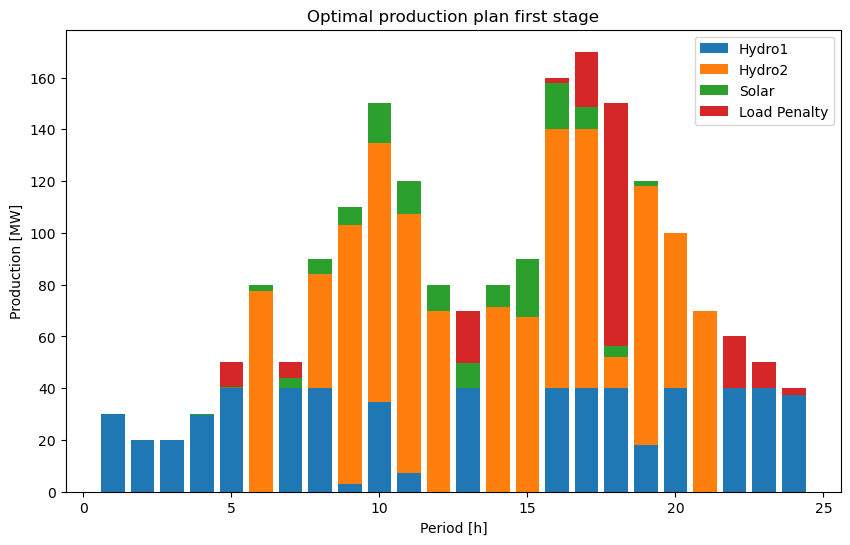

<Figure size 1000x600 with 0 Axes>

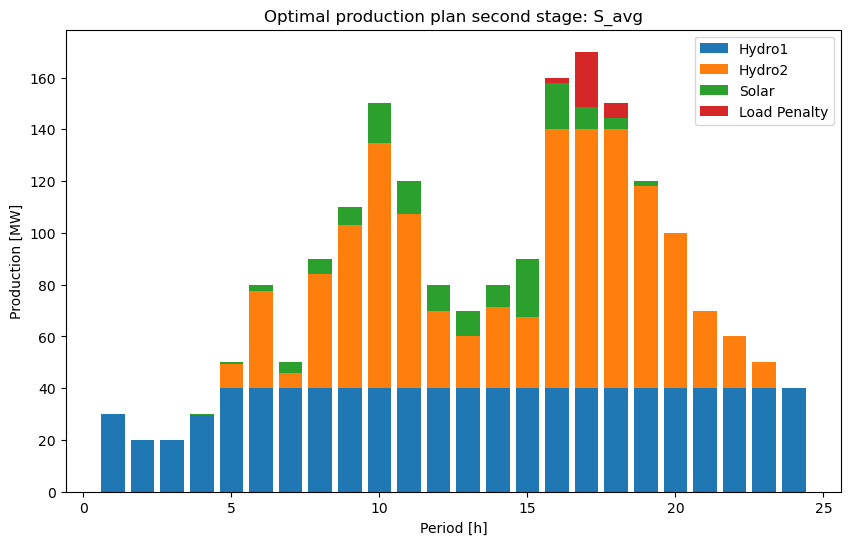

{'Hydro1': 600.2236852800002, 'Hydro2': 1071.8341979199997}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 899.7763147200001
hydro2 S_avg: 928.1658020799999
hydro1 S_low: 0.0
hydro2 S_low: 0.0


<Figure size 1000x600 with 0 Axes>

In [3]:
Constants1= {
    'Load_penalty':100, 
    'Hydro_cap':3000,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':1, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_base=model_setup(Constants1, data)
solve(m_base)
displayresults(m_base)
plotting(m_base)

## Variant 2 (Each scenario individually)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 482 rows, 384 columns and 7584 nonzeros
Model fingerprint: 0x2bc0c539
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+02]
  Bounds range     [4e+01, 1e+02]
  RHS range        [2e-01, 2e+03]
Presolve removed 437 rows and 251 columns
Presolve time: 0.01s
Presolved: 45 rows, 133 columns, 219 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5358911e+05   3.621218e+02   0.000000e+00      0s
      43    1.8266069e+05   0.000000e+00   0.000000e+00      0s

Solved in 43 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.826606936e+05
Model unknow

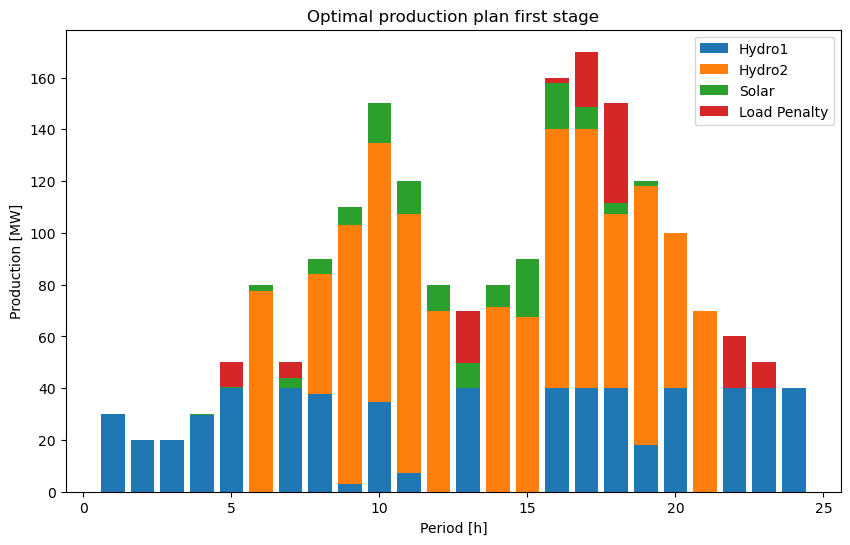

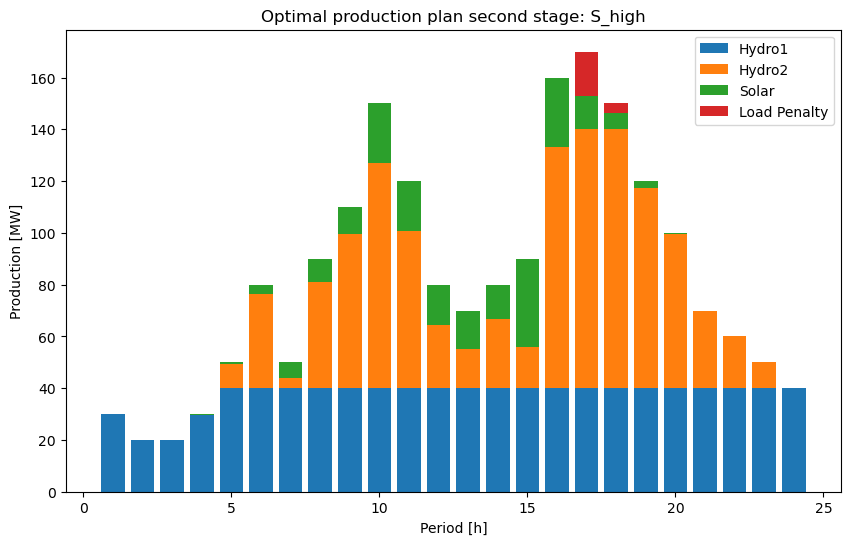

{'Hydro1': 600.33552792, 'Hydro2': 1129.3989360799999}
hydro1 S_high: 899.66447208
hydro2 S_high: 870.60106392
hydro1 S_avg: 0.0
hydro2 S_avg: 0.0
hydro1 S_low: 0.0
hydro2 S_low: 0.0


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [4]:
Constants2_1= {
    'Load_penalty':100, 
    'Hydro_cap':3000,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':1, 'S_avg':0, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_high=model_setup(Constants2_1, data)
solve(m_high)
displayresults(m_high)
plotting(m_high)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 482 rows, 384 columns and 7584 nonzeros
Model fingerprint: 0x20a6f381
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+02]
  Bounds range     [4e+01, 1e+02]
  RHS range        [2e-01, 2e+03]
Presolve removed 438 rows and 254 columns
Presolve time: 0.01s
Presolved: 44 rows, 130 columns, 214 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5888147e+05   3.515270e+02   0.000000e+00      0s
      45    1.9085445e+05   0.000000e+00   0.000000e+00      0s

Solved in 45 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.908544479e+05
Model unknown

  Variables:
    p : Size=48, Index=p_index
        Key            : Lower : Value 

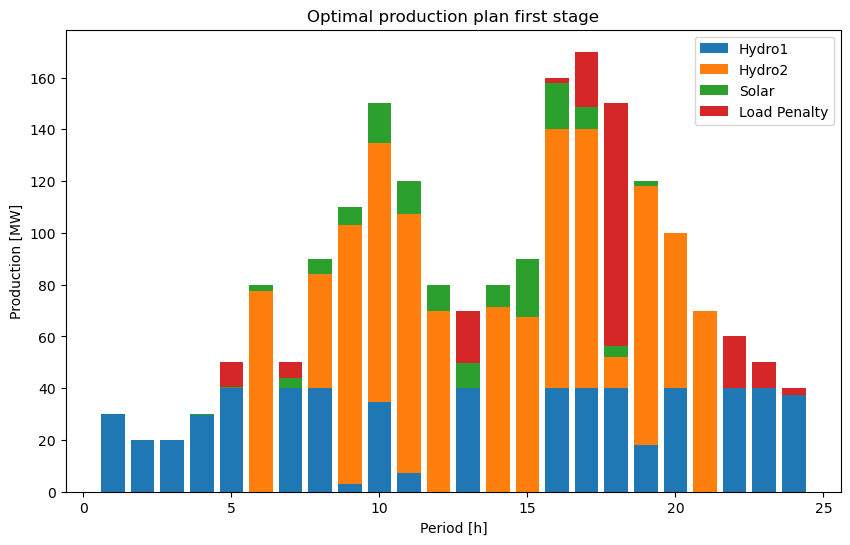

<Figure size 1000x600 with 0 Axes>

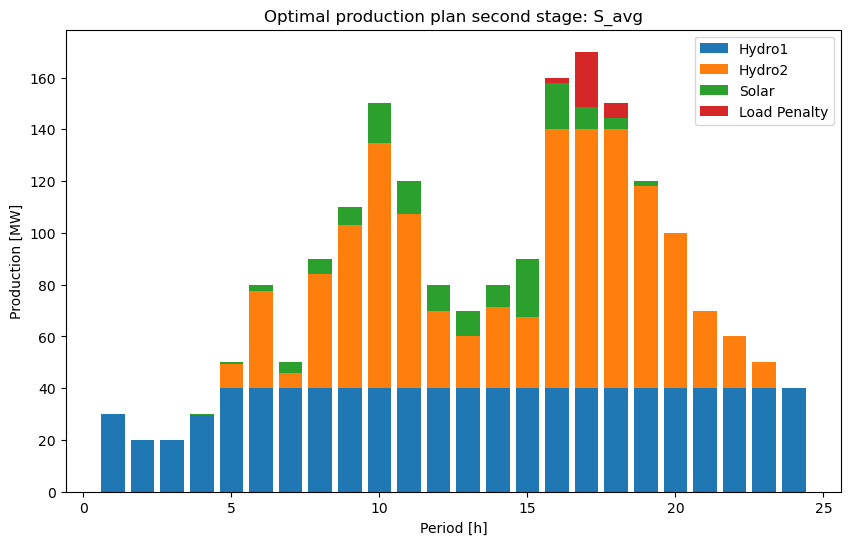

{'Hydro1': 600.2236852800002, 'Hydro2': 1071.8341979199997}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 899.7763147200001
hydro2 S_avg: 928.1658020799999
hydro1 S_low: 0.0
hydro2 S_low: 0.0


<Figure size 1000x600 with 0 Axes>

In [5]:
Constants2_2= {
    'Load_penalty':100, 
    'Hydro_cap':3000,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':1, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}       
}
m_avg=model_setup(Constants2_2, data)
solve(m_avg)
displayresults(m_avg)
plotting(m_avg)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 482 rows, 384 columns and 7584 nonzeros
Model fingerprint: 0x7207985c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+02]
  Bounds range     [4e+01, 1e+02]
  RHS range        [1e-01, 2e+03]
Presolve removed 439 rows and 257 columns
Presolve time: 0.00s
Presolved: 43 rows, 127 columns, 209 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6551244e+05   3.387011e+02   0.000000e+00      0s
      44    1.9962826e+05   0.000000e+00   0.000000e+00      0s

Solved in 44 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.996282628e+05
Model unknown

  Variables:
    p : Size=48, Index=p_index
        Key            : Lower : Value 

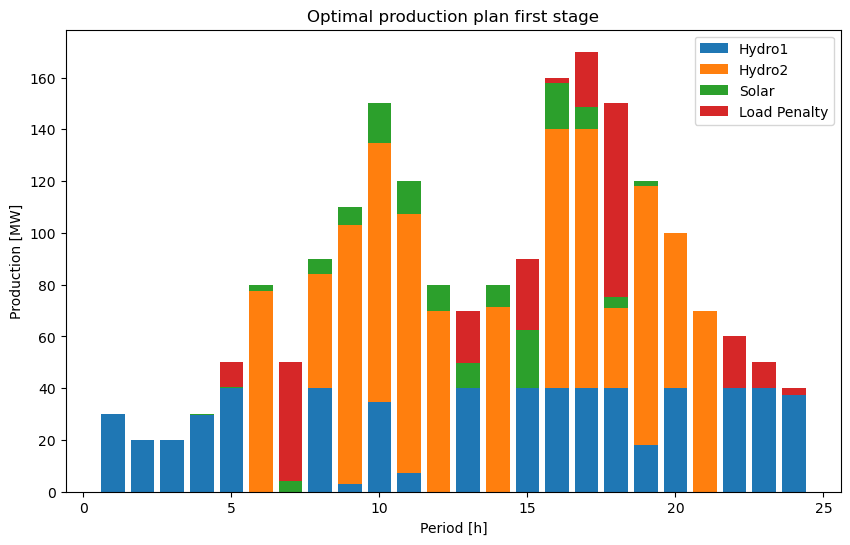

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

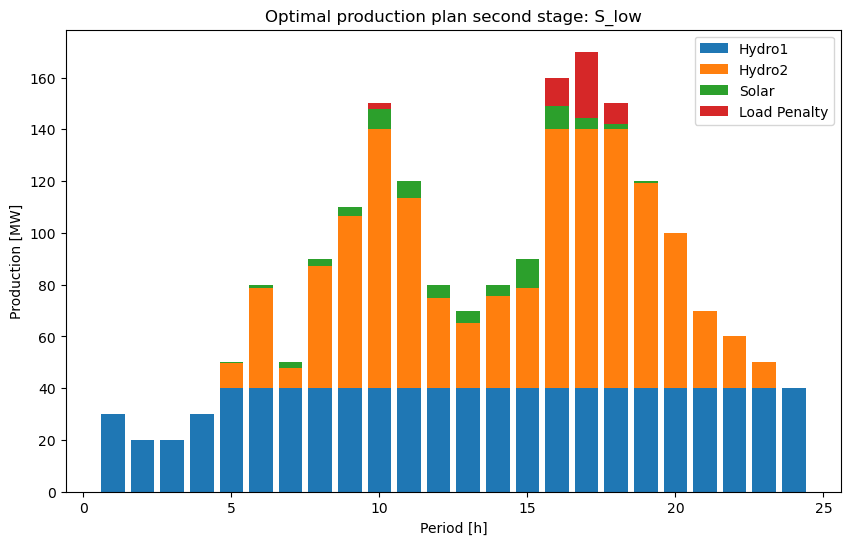

{'Hydro1': 600.11184264, 'Hydro2': 1023.1934703199998}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 0.0
hydro2 S_avg: 0.0
hydro1 S_low: 899.88815736
hydro2 S_low: 976.80652968


In [6]:
Constants2_3= {
    'Load_penalty':100, 
    'Hydro_cap':3000,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':0, 'S_low':1},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}       
}
m_low=model_setup(Constants2_3, data)
solve(m_low)
displayresults(m_low)
plotting(m_low)

## Variant 3 (Stochastic optimization problem w/ non-anticipativity)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 482 rows, 384 columns and 7584 nonzeros
Model fingerprint: 0x635a3f84
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 1e+02]
  Bounds range     [4e+01, 1e+02]
  RHS range        [1e-01, 2e+03]
Presolve removed 392 rows and 124 columns
Presolve time: 0.00s
Presolved: 90 rows, 260 columns, 516 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5932767e+05   8.953085e+02   0.000000e+00      0s
      92    1.9335451e+05   0.000000e+00   0.000000e+00      0s

Solved in 92 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.933545120e+05
Model unknow

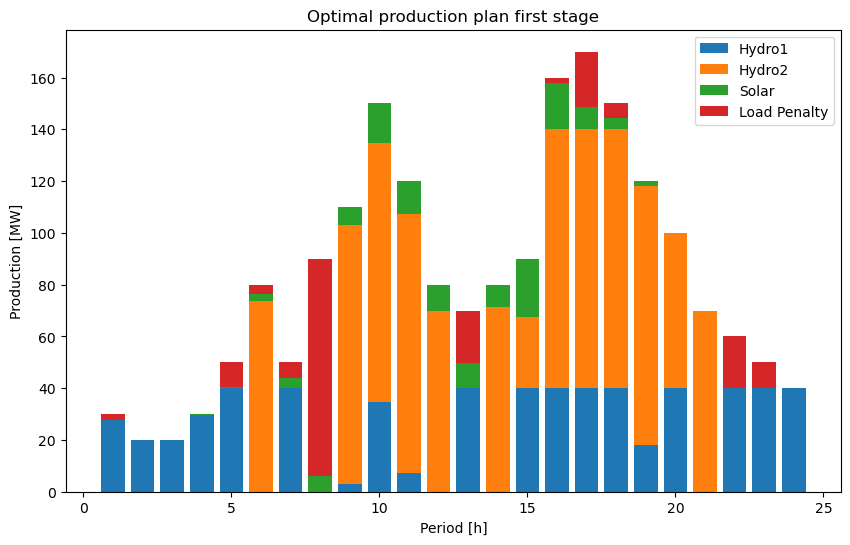

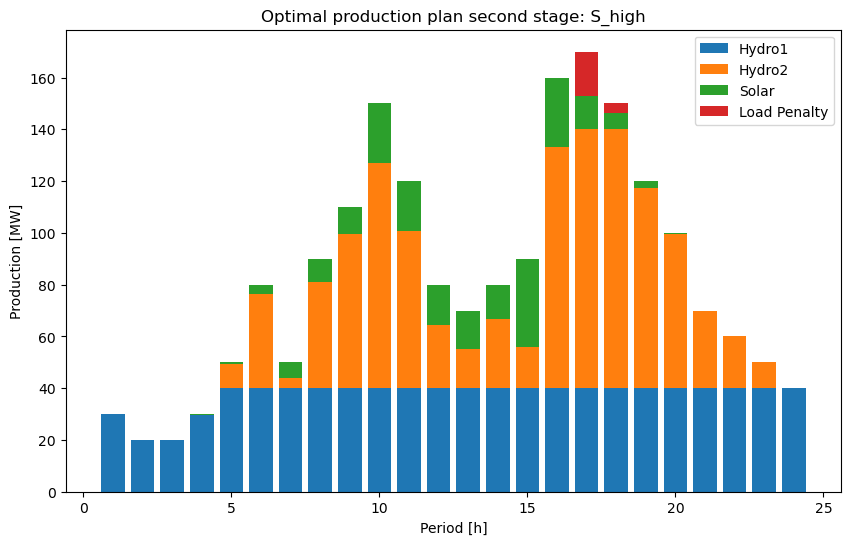

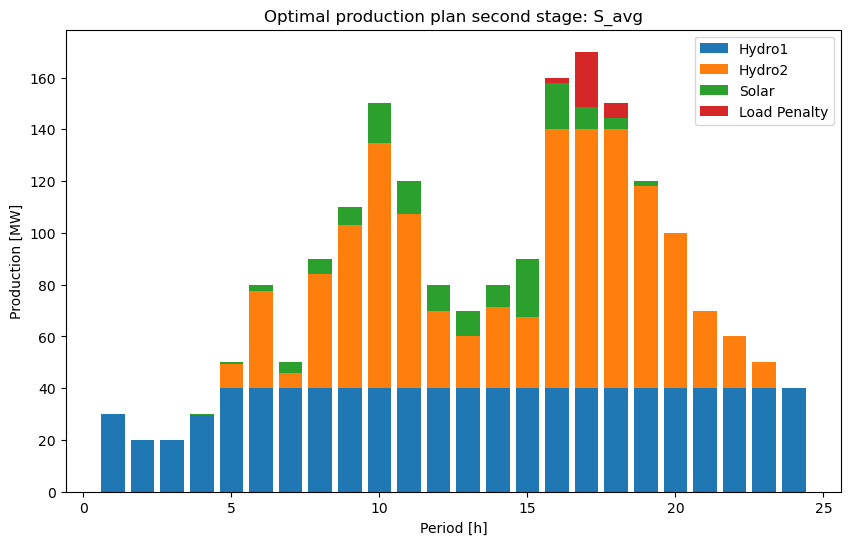

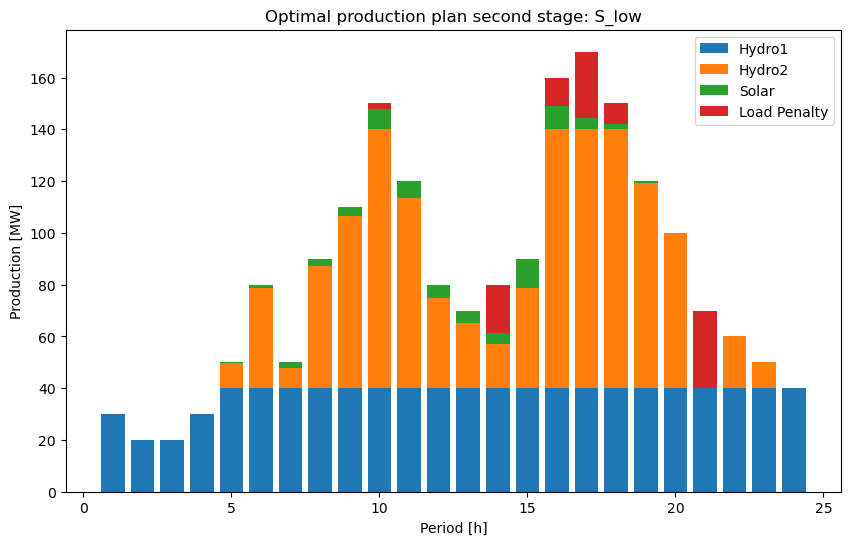

{'Hydro1': 600.2236852800002, 'Hydro2': 1071.8341979199997}
hydro1 S_high: 899.66447208
hydro2 S_high: 870.60106392
hydro1 S_avg: 899.7763147200001
hydro2 S_avg: 928.1658020799999
hydro1 S_low: 899.77631472
hydro2 S_low: 928.1658020799999


In [7]:
Constants2_3= {
    'Load_penalty':100, 
    'Hydro_cap':3000,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':1/3, 'S_avg':1/3, 'S_low':1/3}, 
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_stoch=model_setup(Constants2_3, data)
solve(m_stoch)
displayresults(m_stoch)
plotting(m_stoch)